In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import Sequential, utils
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# add channel to images (required by tensorflow)
img_shape=(28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], *img_shape)
X_test = X_test.reshape(X_test.shape[0], *img_shape)

# convert images to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# scale data between [0,1]
X_train /= 255
X_test /= 255

# convert labels to categorical
num_classes = 10
y_train_cat = utils.to_categorical(y_train, num_classes)
y_test_cat = utils.to_categorical(y_test, num_classes)

In [3]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=img_shape))

model.add(Conv2D(64, kernel_size=3, strides=2, activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

# predict class
model.add(Dense(num_classes, activation='softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [5]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [6]:
# remove previous logs
log_dir = 'logs'
%rm -r "$log_dir" 2> /dev/null

# create callback to store history
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)
tb.set_model(model)

In [7]:
epochs = 10
batch_size = 128
h = model.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_cat), callbacks=[tb])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 408us/sample - loss: 0.2056 - accuracy: 0.9384 - val_loss: 0.0543 - val_accuracy: 0.9827
Epoch 2/10
60000/60000 [==============================] - 24s 392us/sample - loss: 0.0667 - accuracy: 0.9796 - val_loss: 0.0398 - val_accuracy: 0.9863
Epoch 3/10
60000/60000 [==============================] - 24s 393us/sample - loss: 0.0466 - accuracy: 0.9852 - val_loss: 0.0342 - val_accuracy: 0.9880
Epoch 4/10
60000/60000 [==============================] - 23s 389us/sample - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0320 - val_accuracy: 0.9895
Epoch 5/10
60000/60000 [==============================] - 23s 391us/sample - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0368 - val_accuracy: 0.9878
Epoch 6/10
60000/60000 [==============================] - 24s 400us/sample - loss: 0.0236 - accuracy: 0.9922 - val_loss: 0.0338 - val_accuracy: 0.9893
Epoch 7/10
60000/60000 [====================

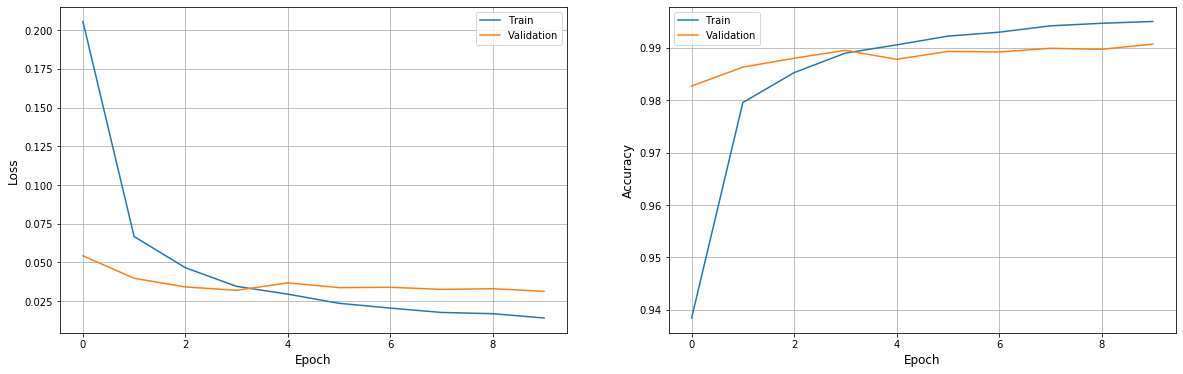

In [8]:
plt.figure(figsize=(20, 6))
fontsize = 12

plt.subplot(1, 2, 1)
plt.plot(h.history['loss'], label='Train')
plt.plot(h.history['val_loss'], label='Validation')
plt.xlabel('Epoch', fontsize=fontsize)
plt.ylabel('Loss', fontsize=fontsize)
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(h.history['accuracy'], label='Train')
plt.plot(h.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch', fontsize=fontsize)
plt.ylabel('Accuracy', fontsize=fontsize)
plt.legend()
plt.grid()

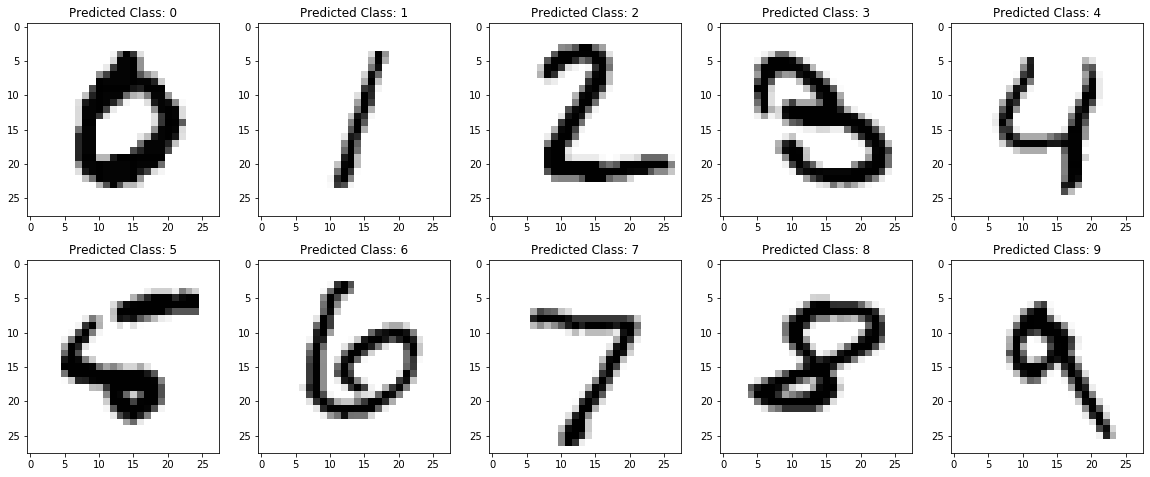

In [9]:
# find first occurrence of each digit in test data and predict class
index = [np.where(y_test == i)[0][0] for i in range(num_classes)]
imgs = X_test[index]
digits = model.predict_classes(imgs)

rows = 2
cols = 5
fig, axs = plt.subplots(rows, cols, figsize=(20, 8))

# plot each image and display the predicted class
for i in range(rows):
    for j in range(cols):
        index = j + i*cols
        axs[i,j].imshow(imgs[index].reshape(img_shape[0:2]), cmap='gray_r');
        axs[i,j].set_title(f'Predicted Class: {digits[index]}')

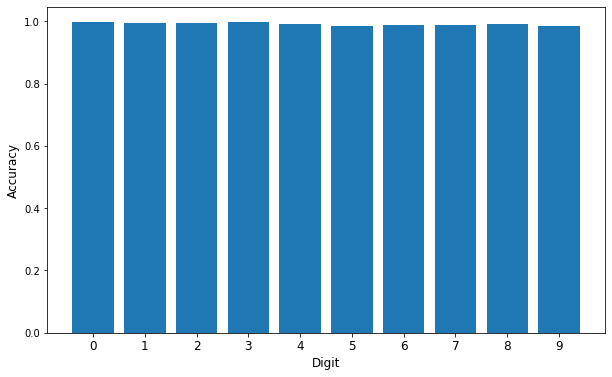

In [10]:
# get accuracy on test data by digit
digits = range(num_classes)
index = [y_test == i for i in digits]
acc = [model.evaluate(X_test[i], y_test_cat[i], verbose=0)[1] for i in index]

plt.figure(figsize=(10, 6))
plt.bar(digits, acc)
plt.xlabel('Digit', fontsize=fontsize)
plt.ylabel('Accuracy', fontsize=fontsize)
plt.xticks(digits, fontsize=fontsize);